## Codice Classi

In [1]:
import pandas as pd

In [110]:
file = 'Data.txt'   #Aggiungere il nome del file!
setdati = pd.read_csv(file, index_col='data', parse_dates=True, sep=',')  #Legge i dati


class positivi: 
    
    def __init__(self, setdati, Regione): 

        data1 = setdati[['denominazione_regione','totale_positivi']]  #Seleziona un sottoinsieme di dati
        dummy = data1                                                 #crea una variabile interna
        for i, (reg, valori) in enumerate(data1.groupby('denominazione_regione')):    #selezione i dati per regione e
            if reg == Regione:                                                        #rinomina l'etichetta
                dummy = valori.drop(['denominazione_regione'], axis=1)
                dummy['Positivi ' + Regione] = dummy[['totale_positivi']]
                dummy = dummy.drop(['totale_positivi'], axis=1)
                
        self.pos = dummy 
    
        self.pos.plot() 
        
        
class positivi_confronto: 
    

    def __init__(self, setdati, Regione1, Regione2): 
        
        sottoinsieme = 'totale_positivi'
        nome = 'Positivi'
        data1 = setdati[['denominazione_regione', sottoinsieme]]
        dummy = data1
        for i, (reg, valori) in enumerate(data1.groupby('denominazione_regione')):  
            if reg == Regione1:
                dummy = valori.drop(['denominazione_regione'], axis=1) 
                dummy[nome + ' ' + Regione1] = dummy[[sottoinsieme]]
                dummy = dummy.drop([sottoinsieme], axis=1)
            
    
            
        for i, (reg, valori) in enumerate(data1.groupby('denominazione_regione')):   
            if reg == Regione2:
                dummy[nome + ' ' + Regione2] =  valori.drop(['denominazione_regione'], axis=1)
        
    
        self.pos = dummy          
        
        self.pos.plot() 

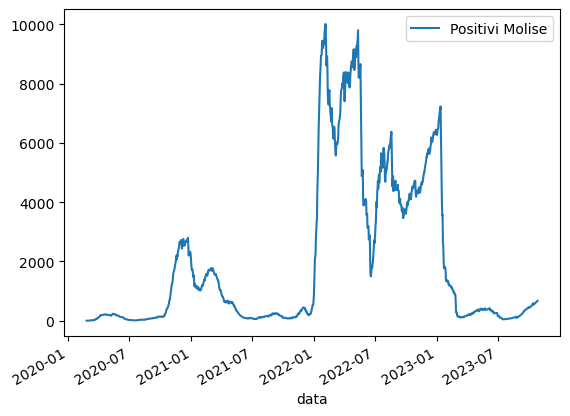

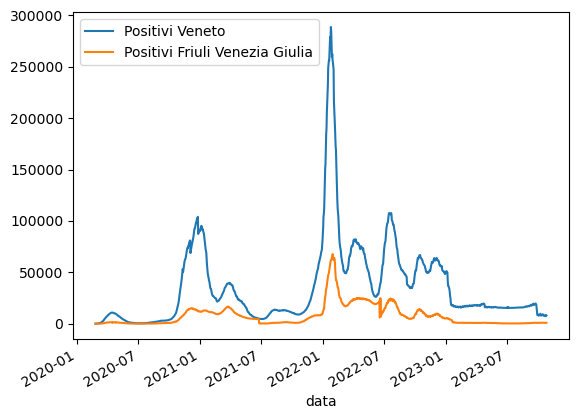

In [112]:
grafico = positivi(setdati, 'Molise') 
grafico = positivi_confronto(setdati, 'Veneto', 'Friuli Venezia Giulia') 